# Methodology for Analysis of Website Traffic and Revenue
##Objective:

To determine the impact of website traffic on revenue and identify the top-performing products and customer groups.

##Data:

- Website traffic data
- Sales data
- Customer data

##Analysis:

# 1. Impact of Website Traffic on Revenue:

Define Variables:

- Y (Dependent Variable): Revenue
- X (Independent Variable): Website Traffic (unique visits / total visits)

Model:

- Use linear regression from the statsmodels library to model the relationship between website traffic and revenue.

Evaluation:

- Assess the significance of the relationship using p-value. If p-value < 0.05, reject the null hypothesis that there is no relationship between website traffic and revenue.
- Calculate R-squared to determine the proportion of variance in revenue explained by website traffic.

# 2. Top-Performing Products:

Identify:

- Calculate pageviews and revenue for each product.
- Rank products by pageviews and revenue.

Visualize:

- Create bar charts or tables to visualize the top-performing products based on pageviews and revenue.

# 3. Customer Segmentation:

Clustering:

- Use the K-means clustering algorithm to group customers based on their purchase history and demographics.
- Determine the optimal number of clusters (k) using elbow method or silhouette analysis.

Analysis:

- Analyze the characteristics of each customer segment.
- Identify the most profitable customer segments.

Tools:

- Python programming language
- Statsmodels library
- Pandas library
- Matplotlib library

Deliverables:

A comprehensive report summarizing the findings, including:
- Analysis of the impact of website traffic on revenue
- Identification of the top-performing products
- Segmentation of customers into distinct groups
- Visualizations to support the analysis

# Data Preprocessing

### Import Library

In [ ]:
import pandas as pd
import numpy as np

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Customers (UK)

In [ ]:
import pandas as pd

# Đọc file Excel
df = pd.read_excel('/content/drive/MyDrive/XD32 - Nhóm 4/Lesson 12 - Test/DA_TEST_1/customers (UK).xlsx', sheet_name=None)

# In ra tên các sheet
print(df.keys())

dict_keys(['customer info', 'Trang tính1', 'Items', 'Customer transactions'])


### customer_info

In [ ]:
# Truy cập dữ liệu của từng sheet
customers_info = df['customer info']
customers_info

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


In [ ]:
customers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          770 non-null    int64         
 1   FirstName   770 non-null    object        
 2   LastName    770 non-null    object        
 3   Country     770 non-null    object        
 4   DateJoined  770 non-null    datetime64[ns]
 5   Gender      519 non-null    object        
 6   Birthday    770 non-null    datetime64[ns]
 7   Newsletter  770 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 48.2+ KB


In [ ]:
#Replace null values
customers_info['Gender'] = customers_info['Gender'].replace(np.nan,'O')
customers_info

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,O,1965-07-25,Y
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


### Trang tính1

In [ ]:
# Truy cập dữ liệu của từng sheet
sheet2 = df['Trang tính1']

In [ ]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerInfo         7 non-null      object 
 1   Unnamed: 1           0 non-null      float64
 2   CustomerTransaction  5 non-null      object 
 3   Unnamed: 3           0 non-null      float64
 4   Items                5 non-null      object 
 5   Unnamed: 5           0 non-null      float64
 6   Unnamed: 6           7 non-null      object 
 7   Unnamed: 7           0 non-null      float64
 8   Unnamed: 8           1 non-null      object 
dtypes: float64(4), object(5)
memory usage: 632.0+ bytes


In [ ]:
# Xóa các cột blank, cột 'Unnamed: 8' chỉ có một giá trị không có ý nghĩa trong sheet "Trang tính 1"
sheet2.drop(columns=["Unnamed: 1", 'Unnamed: 3','Unnamed: 5','Unnamed: 7', 'Unnamed: 8'], inplace=True, errors='ignore')

In [ ]:
sheet2

,CustomerInfo,CustomerTransaction,Items,Unnamed: 6
0,ID,OrderID,ItemID,Traffic
1,FirstName,CustomerID,Product,Page URL
2,LastName,ItemID,Brand,users
3,Country,TransactionDate,SellPrice,uniquePageviews
4,DateJoined,Channel,CostPrice,pageviews
5,Gender,NaN,NaN,Brand
6,Birthday,NaN,NaN,Posted On (DD/MM/YYYY)


Có thể thấy trong sheet customer_trans có thể merge với các sheet khác thông qua CustomerID, ItemID.

### items

In [ ]:
# Truy cập dữ liệu của từng sheet
items = df['Items']
items

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392
...,...,...,...,...,...
17884,17885,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202,42
17885,17886,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463,131
17886,17887,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688,200
17887,17888,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157,63


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ItemID     17889 non-null  int64 
 1   Product    17889 non-null  object
 2   Brand      17889 non-null  object
 3   SellPrice  17889 non-null  int64 
 4   CostPrice  17889 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 698.9+ KB


### customer_transactions

In [ ]:
# Truy cập dữ liệu của từng sheet
customer_trans = df['Customer transactions']
customer_trans

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store
...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store
25209,8361,769,13162,2020-02-04,In Store
25210,8362,769,8727,2020-11-18,In Store
25211,8362,769,13065,2020-05-11,In Store


In [ ]:
customer_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25213 entries, 0 to 25212
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          25213 non-null  int64         
 1   CustomerID       25213 non-null  int64         
 2   ItemID           25213 non-null  int64         
 3   TransactionDate  25213 non-null  datetime64[ns]
 4   Channel          25213 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 985.0+ KB


### Merge sheets together


In [ ]:
customer_trans_merge = customer_trans.merge(customers_info, how='inner', left_on='CustomerID', right_on='ID').\
                          merge(items,how='inner', left_on='ItemID', right_on='ItemID')

In [ ]:
customer_trans_merge

,OrderID,CustomerID,ItemID,TransactionDate,Channel,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,637,57,352,2020-03-15,In Store,57,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
2,0,0,3433,2020-07-14,In Store,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
3,1840,167,3433,2020-05-16,In Store,167,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
4,3386,307,3433,2020-04-23,In Store,307,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,O,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358,769,15836,2020-10-14,In Store,769,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197,146
25209,8359,769,5847,2020-05-27,Online,769,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833,280
25210,8362,769,8727,2020-11-18,In Store,769,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66
25211,8362,769,13065,2020-05-11,In Store,769,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272


In [ ]:
customer_trans_merge.drop('ID', inplace=True, axis=1)

In [ ]:
# Lưu file excel
#customer_trans_merge.to_excel("customer_trans_merge.xlsx")

### Traffic

In [ ]:
import os

directory = '/content/drive/MyDrive/XD32 - Nhóm 4/Lesson 12 - Test/DA_TEST_1/Traffic'

# Lấy danh sách file Excel
filenames = os.listdir(directory)

# Khởi tạo DataFrame rỗng
traffic = pd.DataFrame()

# Duyệt qua từng file Excel
for filename in filenames:
    # Lấy đường dẫn file
    file_path = os.path.join(directory, filename)

    # Đọc file Excel
    temp = pd.read_excel(file_path)

    # Gộp DataFrame
    traffic = pd.concat([traffic, temp], ignore_index=True)

# Hiển thị DataFrame kết quả
print(traffic)


                                  Page URL   users  uniquePageviews  \
0      /2020/11/032slease0.110547324875508   820.0            834.4   
1      /2020/11/100r-info0.785457657814133  1112.4           1133.6   
2       /2020/11/101Please0.84856840042231  4303.4           4404.0   
3      /2020/11/101H-info0.952751257680995  1105.8           1123.4   
4      /2020/11/195Nacing0.790692150708995   898.0            919.2   
...                                    ...     ...              ...   
17884    /2020/2/yveUvideo0.81280619544756    36.2             38.0   
17885   /2020/2/zachrview0.804164871859829   675.2            689.8   
17886   /2020/2/zayrtream0.650670496103332   532.4            547.0   
17887   /2020/2/zebhtream0.817443430528863    40.8             41.8   
17888   /2020/2/zioS7-3000.382635307927753  2693.0           2792.2   

       pageviews                   Brand Posted On (DD/MM/YYYY)  
0          885.2        adgk-a@1D!Aw8\Z`    2020-11-09 10:58:52  
1         1214.

In [ ]:
# Split the Product name from Page URL
traffic['Product'] = range(len(traffic['Page URL']))
for i in range(len(traffic['Page URL'])):
    traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]

<ipython-input-20-30e1b92bde9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]


In [ ]:
traffic

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product
0,/2020/11/032slease0.110547324875508,820.0,834.4,885.2,adgk-a@1D!Aw8\Z`,2020-11-09 10:58:52,032slease0.110547324875508
1,/2020/11/100r-info0.785457657814133,1112.4,1133.6,1214.4,Po?o(_x007f_BPQ8qeQ>)5,2020-11-30 23:03:46,100r-info0.785457657814133
2,/2020/11/101Please0.84856840042231,4303.4,4404.0,4848.4,NiPea$n|Eu@<@>'L,2020-11-17 03:30:29,101Please0.84856840042231
3,/2020/11/101H-info0.952751257680995,1105.8,1123.4,1214.8,NiPea$n|Eu@<@>'L,2020-11-17 15:17:03,101H-info0.952751257680995
4,/2020/11/195Nacing0.790692150708995,898.0,919.2,996.8,"PoAqnL=>P9Qb""ZUa",2020-11-02 08:23:19,195Nacing0.790692150708995
...,...,...,...,...,...,...,...
17884,/2020/2/yveUvideo0.81280619544756,36.2,38.0,42.2,VipZx1>S^s?}%X(},2020-02-19 04:42:09,yveUvideo0.81280619544756
17885,/2020/2/zachrview0.804164871859829,675.2,689.8,721.6,HaQ.STj_Ej9n1|Vi,2020-02-17 10:00:38,zachrview0.804164871859829
17886,/2020/2/zayrtream0.650670496103332,532.4,547.0,583.6,Al_w1b7Rgo1[d5(t,2020-02-28 04:23:48,zayrtream0.650670496103332
17887,/2020/2/zebhtream0.817443430528863,40.8,41.8,43.0,ZeycDNXe1&YnoA\N,2020-02-26 22:21:17,zebhtream0.817443430528863


In [ ]:
traffic.drop('Brand', inplace=True, axis=1)

### Merge Customers_trans_merge and Traffic

In [ ]:
transaction_df = customer_trans_merge.merge(traffic, how='inner', left_on='Product', right_on='Product')
transaction_df.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,...,Newsletter,Product,Brand,SellPrice,CostPrice,Page URL,users,uniquePageviews,pageviews,Posted On (DD/MM/YYYY)
0,0,0,352,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,...,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426,/2020/1/chrUrumor0.784919078952733,833.0,839.6,890.2,2020-01-06 17:48:31
1,637,57,352,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,...,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426,/2020/1/chrUrumor0.784919078952733,833.0,839.6,890.2,2020-01-06 17:48:31
2,0,0,3433,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,...,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491,/2020/11/corGvideo0.268391324982493,249.0,254.8,269.4,2020-11-24 00:24:41
3,1840,167,3433,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,...,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491,/2020/11/corGvideo0.268391324982493,249.0,254.8,269.4,2020-11-24 00:24:41
4,3386,307,3433,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,O,...,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491,/2020/11/corGvideo0.268391324982493,249.0,254.8,269.4,2020-11-24 00:24:41


In [ ]:
transaction_df.drop('Page URL', inplace=True, axis=1)

In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25213 entries, 0 to 25212
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OrderID                 25213 non-null  int64         
 1   CustomerID              25213 non-null  int64         
 2   ItemID                  25213 non-null  int64         
 3   TransactionDate         25213 non-null  datetime64[ns]
 4   Channel                 25213 non-null  object        
 5   FirstName               25213 non-null  object        
 6   LastName                25213 non-null  object        
 7   Country                 25213 non-null  object        
 8   DateJoined              25213 non-null  datetime64[ns]
 9   Gender                  25213 non-null  object        
 10  Birthday                25213 non-null  datetime64[ns]
 11  Newsletter              25213 non-null  object        
 12  Product                 25213 non-null  object

In [ ]:
transaction_df=transaction_df.drop_duplicates()
transaction_df.shape

(25213, 20)

In [ ]:
# Lưu file excel
#transaction_df.to_excel("transaction_df.xlsx")

# 1. What is the impact of our website traffic on revenue?

Let's assume website traffic only directly affects the revenue of the Online channel. More information is needed to be able to say that website traffic affects the revenue of the Offline channel (In Store)

### Preparation

In [ ]:
df_1 = transaction_df.copy()

In [ ]:
df_1.describe()

,OrderID,CustomerID,ItemID,TransactionDate,DateJoined,Birthday,SellPrice,CostPrice,users,uniquePageviews,pageviews,Posted On (DD/MM/YYYY)
count,25213.000000,25213.000000,25213.000000,25213,25213,25213,25213.000000,25213.000000,25213.000000,25213.000000,25213.000000,25213
mean,4172.435133,382.028795,8968.634712,2020-06-29 10:56:55.095387392,2016-03-30 10:57:53.351049216,1988-07-22 21:11:34.356086144,809.789315,268.738072,1425.998810,1467.588569,1641.934074,2020-06-15 15:44:20.557529856
min,0.000000,0.000000,1.000000,2020-01-01 00:00:00,2015-03-02 00:00:00,1965-01-20 00:00:00,43.000000,40.000000,0.200000,0.200000,0.400000,2020-01-01 01:46:40
25%,2088.000000,188.000000,4537.000000,2020-04-02 00:00:00,2016-01-26 00:00:00,1978-04-17 00:00:00,524.000000,155.000000,326.600000,332.400000,356.800000,2020-03-24 16:21:10
50%,4153.000000,383.000000,8967.000000,2020-06-27 00:00:00,2016-06-02 00:00:00,1989-02-26 00:00:00,806.000000,267.000000,624.000000,635.400000,683.600000,2020-06-15 10:04:19
75%,6260.000000,574.000000,13450.000000,2020-09-26 00:00:00,2016-09-05 00:00:00,1999-07-16 00:00:00,1102.000000,383.000000,1344.800000,1380.200000,1489.600000,2020-09-04 12:24:21
max,8362.000000,769.000000,17889.000000,2020-12-27 00:00:00,2016-09-15 00:00:00,2010-12-01 00:00:00,1964.000000,500.000000,215222.600000,221108.400000,232177.000000,2020-12-09 23:20:17
std,2412.520524,222.895855,5161.343238,NaN,NaN,NaN,348.490115,132.725391,3717.527604,3876.180973,4935.257168,NaN


In [ ]:
# uniquePageviews / pageviews ratio
df_1['web_traffic_ratio'] = np.divide(df_1['uniquePageviews'], df_1['pageviews'])
df_1['web_traffic_ratio'].head()

0    0.943159
1    0.943159
2    0.945805
3    0.945805
4    0.945805
Name: web_traffic_ratio, dtype: float64

In [ ]:
online_transactions = df_1[df_1['Channel'] == 'Online']

total_sell_price_per_product = online_transactions.groupby('Product')['SellPrice'].sum()

print(total_sell_price_per_product)

Product
007Ywatch0.906707330424838      622
032ekbook0.534713694668182     2034
032slease0.110547324875508     1276
070ttream0.518887735674677      717
10-Dhibli0.14039143981496      1151
                               ... 
zipBlease0.0313238391182887     707
zoeu-news0.86467184397373      1233
zoolakami0.244773192837841      365
zozQation0.0106886180391892     604
zseFtream0.740893188572541     1936
Name: SellPrice, Length: 9044, dtype: int64


In [ ]:
total_sell_price_per_product.describe()

count    9044.000000
mean     1127.261720
std       756.111297
min        45.000000
25%       624.000000
50%       975.000000
75%      1323.250000
max      6690.000000
Name: SellPrice, dtype: float64

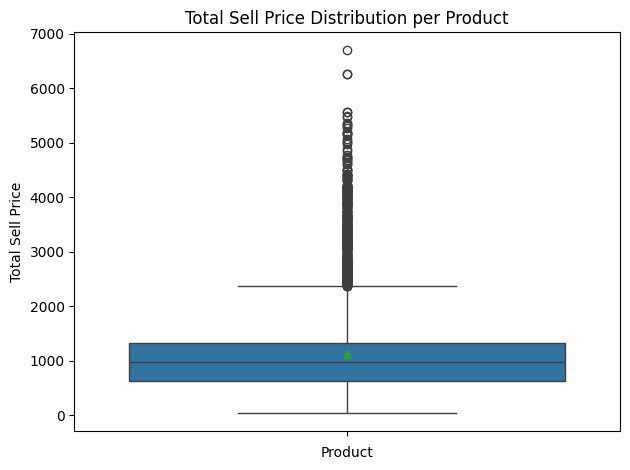

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(
    y="SellPrice",  # Set 'SellPrice' as the value variable on the y-axis
    showmeans=True,  # Display the mean as a diamond marker
    data=total_sell_price_per_product.to_frame()  # Convert Series to DataFrame
)

# Customize the plot (optional)
plt.title("Total Sell Price Distribution per Product")
plt.xlabel("Product")  # Label the x-axis for clarity
plt.ylabel("Total Sell Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [ ]:
df_1['scaled_SellPrice'] = (df_1['SellPrice'] - df_1['SellPrice'].mean()) / df_1['SellPrice'].std()

print(df_1[['SellPrice', 'scaled_SellPrice']].head())


   SellPrice  scaled_SellPrice
0        735         -0.214610
1        735         -0.214610
2        963          0.439641
3        963          0.439641
4        963          0.439641


In [ ]:
# Scale pageview ratio (min-max scaling)
df_1['scaled_web_traffic'] = (df_1['web_traffic_ratio'] - df_1['web_traffic_ratio'].min()) / (df_1['web_traffic_ratio'].max() - df_1['web_traffic_ratio'].min())

print(df_1[['SellPrice', 'web_traffic_ratio', 'scaled_SellPrice', 'scaled_web_traffic']].head())

   SellPrice  web_traffic_ratio  scaled_SellPrice  scaled_web_traffic
0        735           0.943159         -0.214610            0.923861
1        735           0.943159         -0.214610            0.923861
2        963           0.945805          0.439641            0.927406
3        963           0.945805          0.439641            0.927406
4        963           0.945805          0.439641            0.927406


### Linear Regression with Statsmodels

In [ ]:
import statsmodels.api as sm

stats_model = df_1[['scaled_SellPrice', 'scaled_web_traffic']]

stats_model['intercept'] = 1

model = sm.OLS(stats_model['scaled_SellPrice'], stats_model[['intercept', 'scaled_web_traffic']]).fit()

print(model.summary())

r_squared = model.rsquared

p_value = model.pvalues['scaled_web_traffic']

print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")


                            OLS Regression Results                            
Dep. Variable:       scaled_SellPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7871
Date:                Mon, 08 Apr 2024   Prob (F-statistic):              0.375
Time:                        16:10:41   Log-Likelihood:                -35775.
No. Observations:               25213   AIC:                         7.155e+04
Df Residuals:                   25211   BIC:                         7.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.1259      0

<ipython-input-38-b9ee0a75daa9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_model['intercept'] = 1


Based on the linear regression analysis results, it cannot be definitively concluded that website traffic has an effect on sales (SellPrice).

Why?

- R-squared is very low (zero):
The R-squared value indicates the correlation between website traffic and sales. In this case, an R-squared of zero indicates no linear relationship between the two variables.

- The p-value of the web_traffic regression coefficient is high (0.375):
The p-value indicates the significance of the regression coefficient. A p-value greater than 0.05 (the usual significance threshold) indicates insufficient evidence to conclude that the regression coefficient is different from zero. This means that website traffic may not significantly affect sales in this model.

Although the web_traffic regression coefficient is negative, due to the high p-value, we cannot be certain about the negative relationship between traffic and sales.

Model Improvement:
- Experiment with other machine learning algorithms, such as Random Forest to consider improving prediction accuracy.

### RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

random_fr = df_1.copy()
random_fr = pd.get_dummies(random_fr, columns=['Newsletter'])

X_train, X_test, y_train, y_test = train_test_split(random_fr[['web_traffic_ratio', 'Newsletter_Num']], random_fr['scaled_SellPrice'], test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


R-squared: 0.21044535115047458
MSE: 0.776879629890109


Random Forest Model Results and Comparison
Based on the results, the Random Forest model has:

R-squared: 0.21044535115047458
MSE: 0.776879629890109
Compared to the linear regression model:

R-squared: 0.000 (no linear relationship)
P-value of web_traffic: 0.375 (not significant)
Conclusion:

The Random Forest model performs better than the linear regression model:

A higher R-squared (0.2104 vs 0) indicates that the model can explain 21% of the variation in sales.
A lower MSE (0.7769 vs none) indicates that the model predicts sales more accurately.
Both models do not show a strong relationship between web_traffic and sales:

The p-value of web_traffic is high (0.375) in the linear regression model.
Random Forest may select other variables besides web_traffic to predict sales.

# 2. Which products get us pageviews and revenue?


In [ ]:
product_pageviews = traffic.groupby(['Product']).agg(total_pageviews =('users','sum')).reset_index()

product_pageviews.sort_values('total_pageviews', ascending=False, inplace=True, ignore_index=True)

product_pageviews.head(10)

,Product,total_pageviews
0,sonEies-x0.139039192479287,215222.6
1,porQlease0.507911745358356,155640.0
2,tobH-info0.428382841646979,65819.4
3,ninI-info0.46275630306324,60351.8
4,crow-home0.0127810060365789,54677.8
5,besfeek-50.280274313298435,53508.2
6,nobHlease0.20690948418157,53041.2
7,rogLrecap0.644396392507623,52381.2
8,pumMvideo0.837931992780922,47779.6
9,jefXaunch0.410067394635876,43667.4


In [ ]:
product_revenue = transaction_df.groupby(["Product"]).agg( total_revenue = ('SellPrice','sum')).reset_index()

product_revenue.sort_values('total_revenue', ascending=False, inplace=True, ignore_index=True)

product_revenue.head(10)

,Product,total_revenue
0,hypsrview0.321288570724117,11556
1,reeelease0.452821711209563,9205
2,audE-info0.884915261087885,8428
3,kinv-news0.29905739542661,7980
4,ymc_orson0.319251813809483,7794
5,bmwk-20210.31690704020655,7686
6,ubeYanada0.100113795307302,7552
7,titM-info0.550757203954225,7520
8,samLement0.78565851365938,7518
9,dioa-info0.750756927974235,7422


# 3. What customer segments are there?

RFM Metrics

- Recency: It is the amount of time since the customers most recent transaction. It is measured in days.

- Frequency: Total number of transactions made by the customer.

- Monetary: Total amount the customer has spent across all transactions.

### R-F-M

In [ ]:
df_3 = transaction_df.copy()
df_3

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice,users,uniquePageviews,pageviews,Posted On (DD/MM/YYYY)
0,0,0,352,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426,833.0,839.6,890.2,2020-01-06 17:48:31
1,637,57,352,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426,833.0,839.6,890.2,2020-01-06 17:48:31
2,0,0,3433,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,O,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491,249.0,254.8,269.4,2020-11-24 00:24:41
3,1840,167,3433,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491,249.0,254.8,269.4,2020-11-24 00:24:41
4,3386,307,3433,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,O,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491,249.0,254.8,269.4,2020-11-24 00:24:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358,769,15836,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197,146,1194.0,1223.8,1320.6,2020-08-13 08:02:46
25209,8359,769,5847,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833,280,73.0,74.4,79.8,2020-02-14 22:06:16
25210,8362,769,8727,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66,1754.6,1781.6,1950.0,2020-04-03 04:34:49
25211,8362,769,13065,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272,764.2,773.2,825.0,2020-06-01 05:43:55


In [ ]:
df_3.TransactionDate.max()

Timestamp('2020-12-27 00:00:00')

In [ ]:
import datetime as dt
pin_date = dt.datetime(2020, 12, 28)

rfm = df_3.groupby('CustomerID').agg({'TransactionDate': lambda TransactionDate: (pin_date - TransactionDate.max()).days,
                                     'OrderID': lambda OrderID: OrderID.nunique(),
                                     'SellPrice': lambda SellPrice: SellPrice.sum()})

rfm.head()

,TransactionDate,OrderID,SellPrice
CustomerID,,,
0,5,15,32997
1,13,14,34948
2,17,7,17879
3,8,6,14603
4,6,14,37029


In [ ]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
0,5,15,32997
1,13,14,34948
2,17,7,17879
3,8,6,14603
4,6,14,37029


### K-Mean Algorithm

Scale the data

In [ ]:
#Rescaling the attributes
rfm_df = rfm[['recency', 'frequency','monetary']]

# Instantiate
scaler = StandardScaler() # (x - mean(X)) / standard deviation

# fit transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['recency', 'frequency','monetary']
rfm_df_scaled.head()

,recency,frequency,monetary
0,-0.416455,0.791268,0.479662
1,-0.116202,0.600093,0.624054
2,0.033925,-0.738136,-0.639206
3,-0.303860,-0.929312,-0.881660
4,-0.378923,0.600093,0.778067


Elbow Method

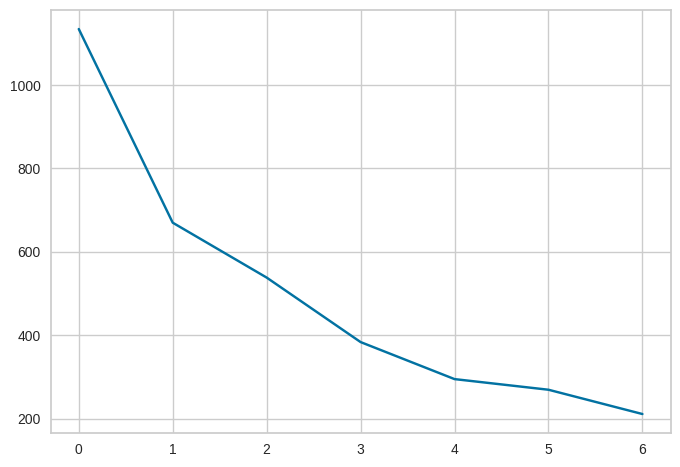

In [ ]:
elbowScore = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init = 'auto')
  kmeans.fit(rfm_df_scaled)

  elbowScore.append(kmeans.inertia_)

# plot the elbowScores for each n_clusters
plt.plot(elbowScore);

In [ ]:
# Cluster = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)

# Insert Cluster to rfm table
# Assign the label
rfm['Cluster'] = kmeans.labels_
rfm.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,recency,frequency,monetary,Cluster
CustomerID,,,,
0,5,15,32997,1
1,13,14,34948,1
2,17,7,17879,0
3,8,6,14603,0
4,6,14,37029,1


In [ ]:
def boxPlotOnCluster(data, onCluster):
  f, axes = plt.subplots(1,3, figsize = (20,8))

  axes[0].set_title("recency")
  sns.boxplot (x=onCluster, y='recency', data=data,ax=axes[2]);
  axes[0].set_title("frequency")
  sns.boxplot (x=onCluster, y='frequency', data=data,ax=axes[1]);
  axes[0].set_title("monetary")
  sns.boxplot (x=onCluster, y='monetary', data=data,ax=axes[0]);
  plt.show();

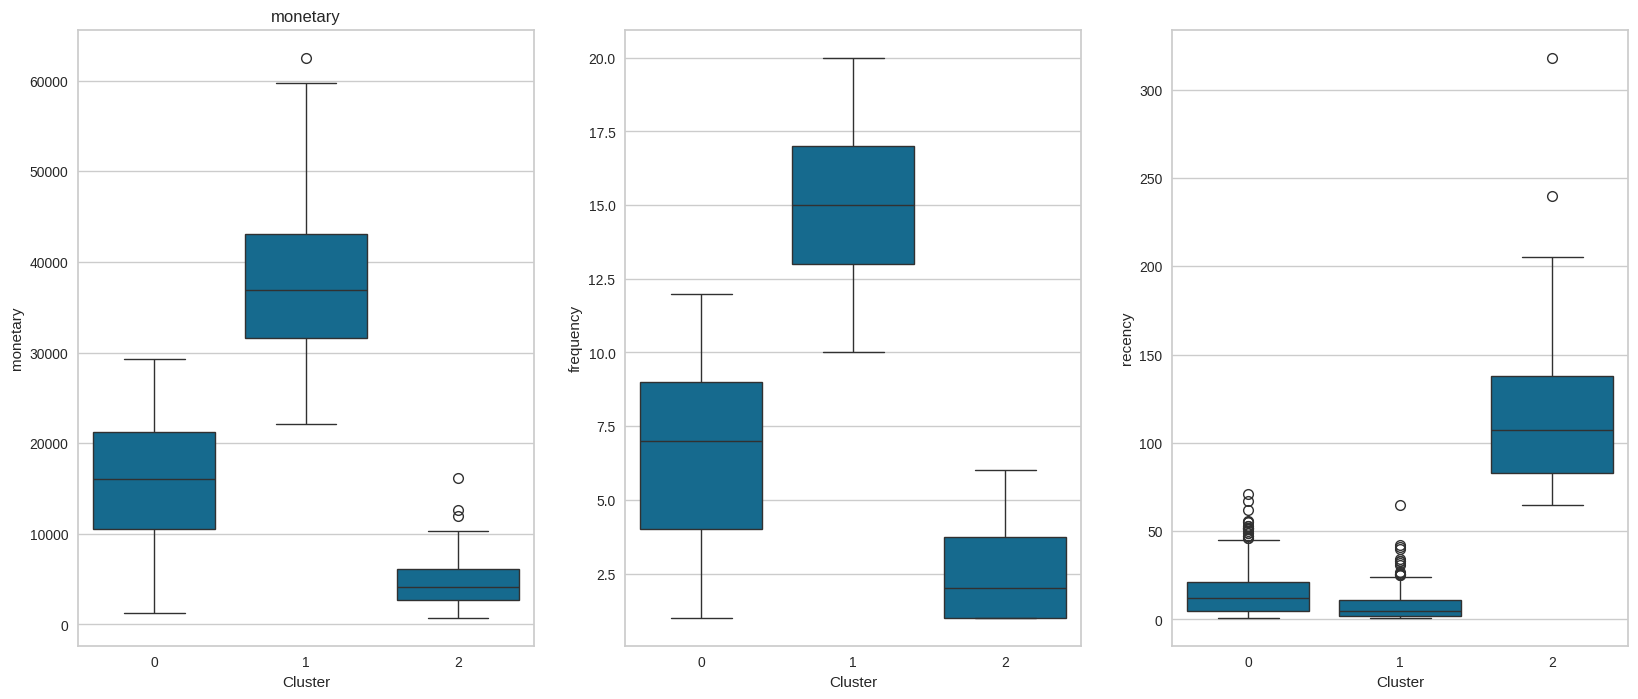

In [ ]:
boxPlotOnCluster(rfm, 'Cluster')

Based on the information, we can segment the customers into 3 groups:

Group 1:

- Average spending: ~15,000
- Average number of purchases: ~7 times
- Recent purchase time: Within a reasonable timeframe

Group 2:

- Highest spending: ~35,000
- Most frequent purchases: ~15 times
- Most recent purchase time: Most recent

Group 3:

- Lowest spending: ~5,000
- Least frequent purchases: ~25 times
- Longest time since last purchase: ~100 days, with some customers not returning for nearly a year (considered lost)

Additional Analysis:

Group 1: These customers have a moderate spending level and purchase frequency. They are likely to be regular customers who are familiar with your products or services.

Group 2: These customers are your high-value customers. They spend the most money and make the most purchases. It is important to retain these customers and encourage them to continue spending.

Group 3: These customers have the lowest spending level and purchase frequency. They may be new customers or customers who have not been active in a while. It is important to reactivate these customers and encourage them to make more purchases.